#  Problem Statement: Airbnb Hotel Booking Analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative marketplace. Established in 2008 in San Francisco, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb’s operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

# QUESTIONS

This project is aimed to uncover some insights from the Airtint Open Data. The following questions would be answered from the data

1. What are the different property types in the Dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhoods group have the highest average prices for Airtinb listings?

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews

7. Is there a correlation between the price of a listing and its service fee?

8. What is the average review rate number (eg, stars) for listings, and does    it vary based on the neighborhood group and mom type?

9. Are hosts with a higher calculated host listings count more likely to maintain higher avaliability throughout the year?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Read data
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")
df.head(15)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,14.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,58.0,2.0,118.0,2017-07-21,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


# **Problem Identified**


*   541 duplicated Records where found in the Data.
*   Insufficient information were recorded for the house_rules and Licence columns.
*   Dollar signs and commas recorded along with the values for price and service fee.
*   The currency for price and service fee were not added to the column's titles.
*   Missing values in some records
*   Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
*   In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
*   Some outliers were identified in the availability 365 column.



# **Cleaning Data**
* Drop duplicated records.
* Drop house_rules and license columns with insufficient data.
* Remove all dollar signs in the price and service fee columns.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.
* Correct the Spelling of 'brookin' to 'Brooklyn'
* Get rid of outliers in the 'availability 365' column data.

In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace = True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$','', regex= False)
df['service fee'] = df['service fee'].astype(str).str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex= False)
df['service fee'] = df['service fee'].str.replace(',','', regex= False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
'price': 'price_$',
'service fee': 'service_fee_$'
}, inplace= True)

#Drop all records with missing values
df.dropna(inplace = True)

#Change all mismatched data types to the appropriate once.
df['price_$'] =df ['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df ['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365'] > 500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,83796


In [ ]:
df.shape

(83796, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

# Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


In [ ]:
#What are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


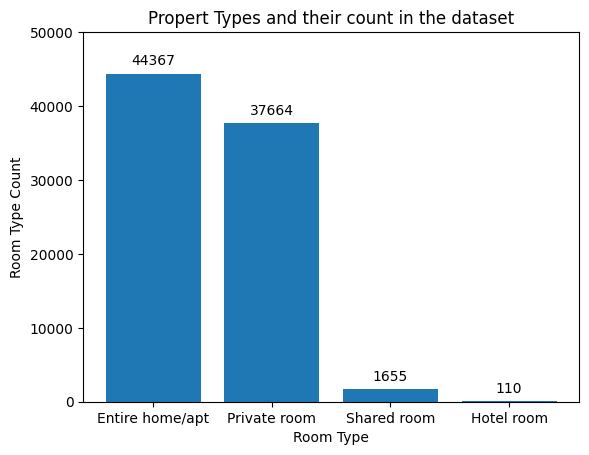

In [ ]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Propert Types and their count in the dataset');

In [ ]:
#Which neighbourhood group has the highest number of listings?
neighbourhood_group = df['neighbourhood group'].value_counts().to_frame()
neighbourhood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


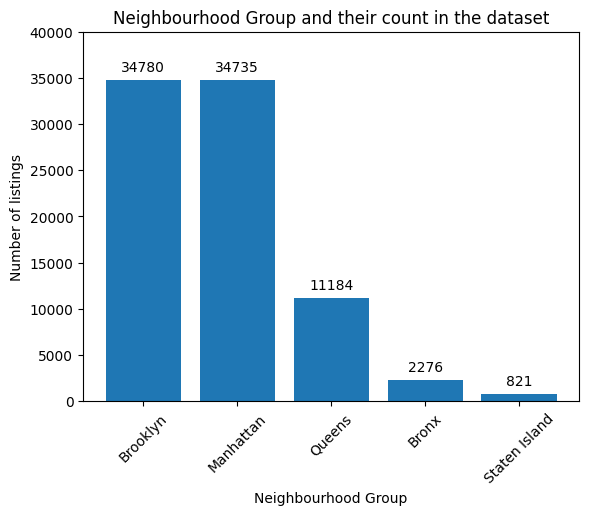

In [ ]:
neighbourhood_group_bar = plt.bar(neighbourhood_group.index, neighbourhood_group.loc[:,'count']);
plt.bar_label(neighbourhood_group_bar,labels=neighbourhood_group.loc[:,'count'],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of listings');
plt.xticks(rotation= 45);
plt.title('Neighbourhood Group and their count in the dataset');

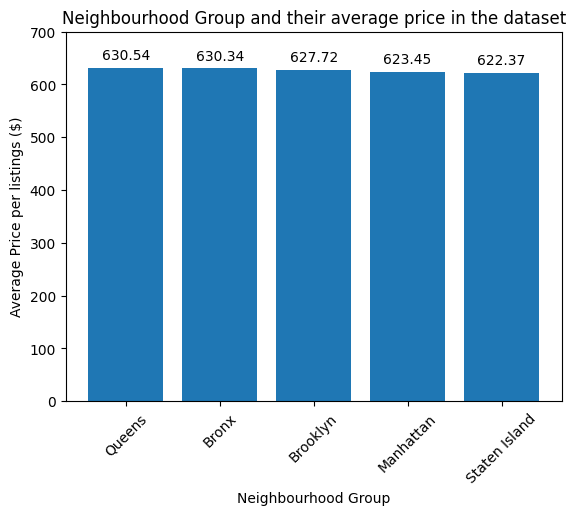

In [ ]:
#Which neighbourhood group have the highest average prices for the Airbnb listings?
neighbourhood_group_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
neighbourhood_group_price_bar = plt.bar(neighbourhood_group_price.index, neighbourhood_group_price.loc[:,'price_$']);
plt.bar_label(neighbourhood_group_price_bar, labels=round(neighbourhood_group_price.loc[:,'price_$'],2), label_type = 'edge' , padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation= 45);
plt.title('Neighbourhood Group and their average price in the dataset');

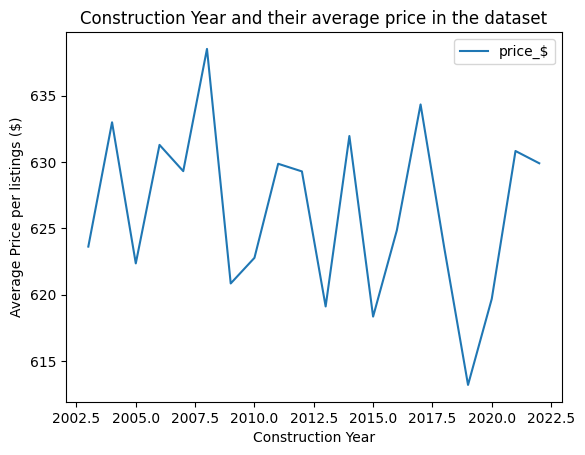

In [ ]:
#Is there a relationship between the construction year of property and price ?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price per listings ($)');
plt.title('Construction Year and their average price in the dataset');


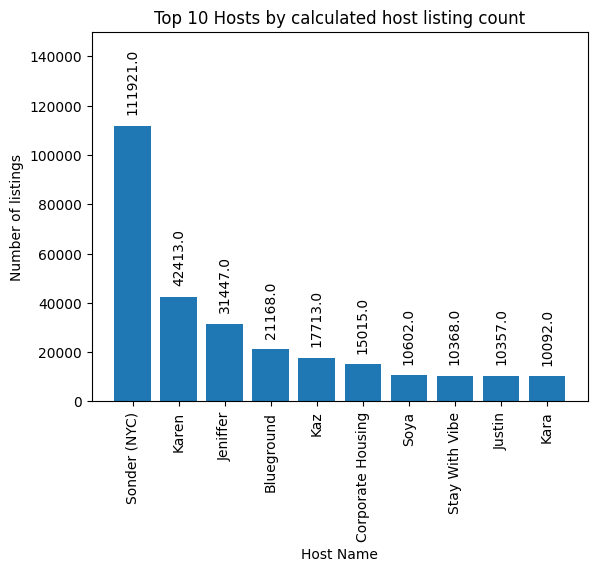

In [ ]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,labels=hosts.loc[:,'calculated host listings count'],label_type = 'edge',padding=8,rotation=90);
plt.ylim([0,150000]);
plt.xlabel('Host Name');
plt.ylabel('Number of listings');
plt.xticks(rotation= 90);
plt.title('Top 10 Hosts by calculated host listing count');

In [ ]:
#Are hosts with verified identities more likely to receive positive riviews?
review= df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


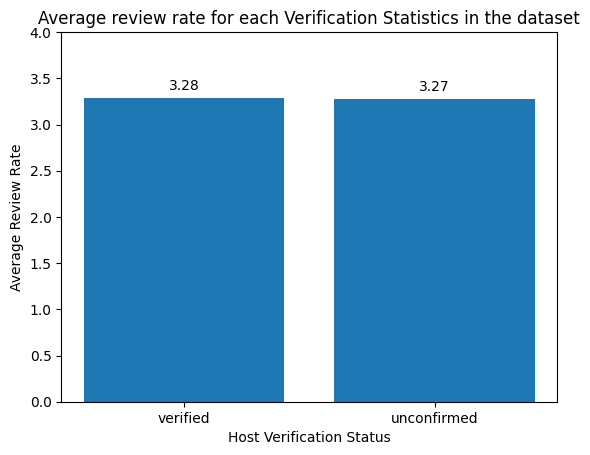

In [ ]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate');
plt.title('Average review rate for each Verification Statistics in the dataset');

In [ ]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976475)

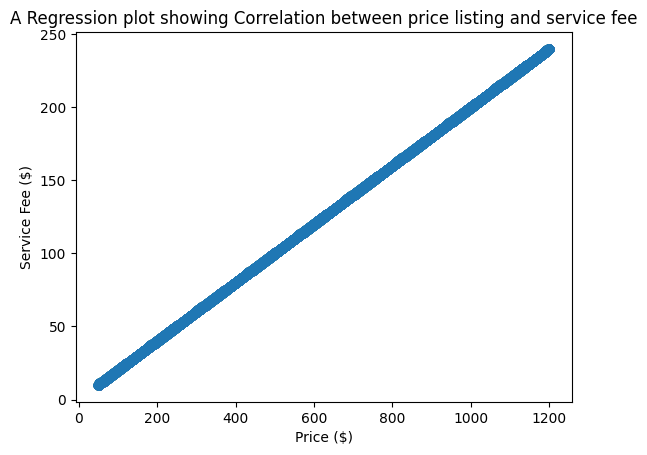

In [ ]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression plot showing Correlation between price listing and service fee');

In [ ]:
#What is the average review rate number for listings, and does it vary based on the neighbourhood group and room type?
ARRN=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

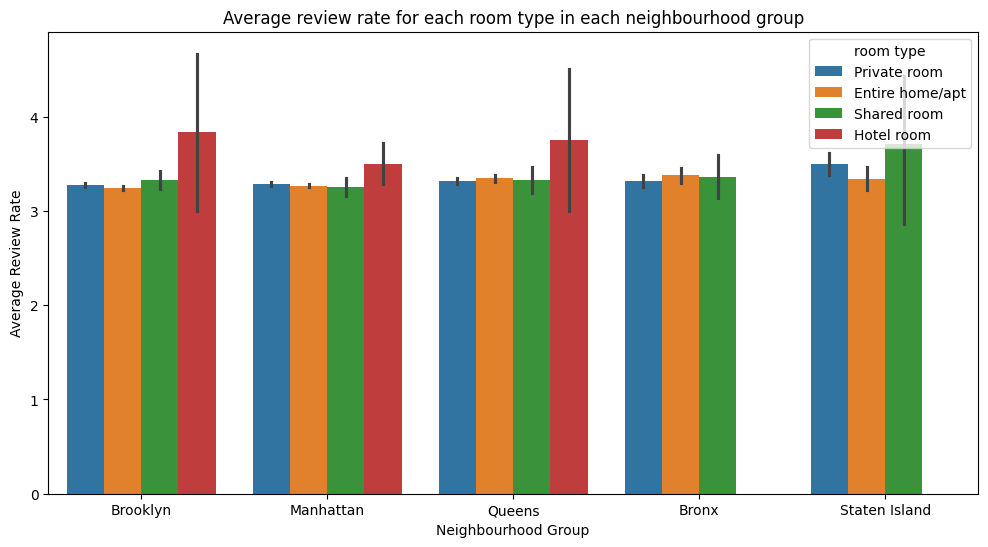

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=df);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average review rate for each room type in each neighbourhood group');


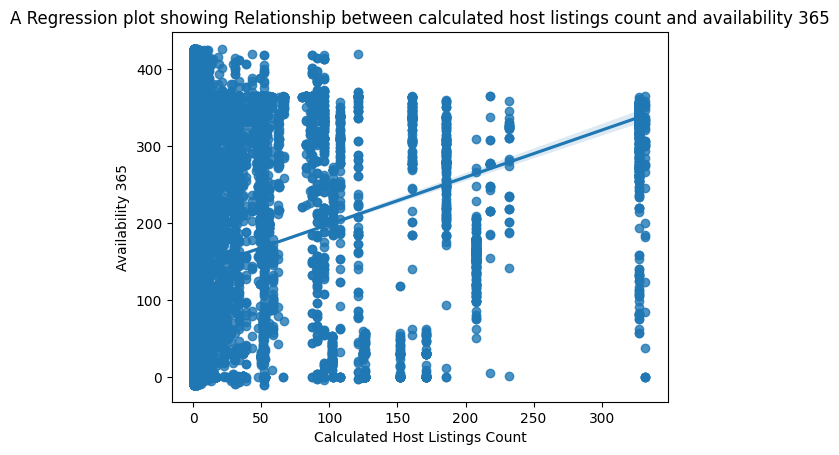

In [ ]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('A Regression plot showing Relationship between calculated host listings count and availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])


np.float64(0.1353372562905425)